In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import butter, filtfilt
from sklearn.decomposition import FastICA

In [12]:
data = pd.read_csv('data/train/Data_S06_Sess04.csv')
feedback_times = data[data['FeedBackEvent'] == 1]['Time']
fs = 200 # sampling frequency
default_channel = 'Fp1'
channels = data.columns[1:-2]

In [17]:
def bandpass_filter_all(part, lowcut = 1, highcut = 40, order = 5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_part = part.copy()
    for channel in channels:
        filtered_part[channel] = filtfilt(b, a, part[channel])
    return filtered_part

def get_part_after_feedback(feedback_id = 0):
    t = feedback_times.iloc[feedback_id]
    return data[(data['Time'] >= t - 0.2) & (data['Time'] <= t + 1.0)], t

def plot_channel(part, t, channel = default_channel, title = None):
    time = (part['Time'] - t) * 1000
    plt.plot(time, part[channel])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

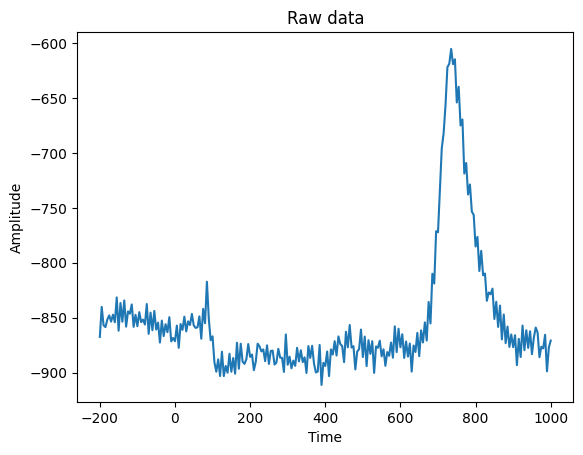

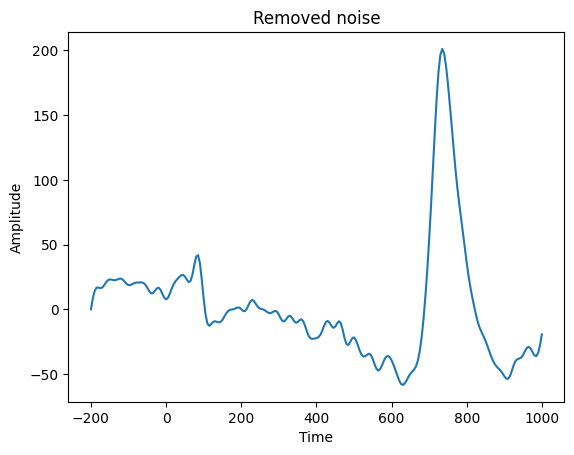

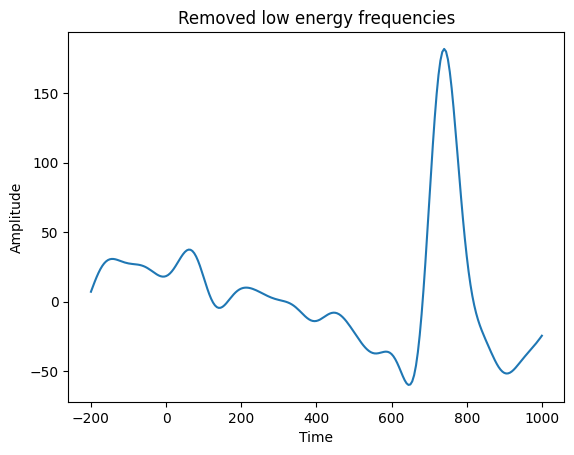

In [ ]:
part, t = get_part_after_feedback(0)

# plot without filters
plot_channel(part, t, title='Raw data')

# remove noise
temp = bandpass_filter_all(part, highcut=30)
plot_channel(temp, t, title='Removed noise')

# remove low energy frequencies
filtered_data = bandpass_filter_all(temp, lowcut=0.2, highcut=10)
plot_channel(filtered_data, t, title='Removed low energy frequencies')

# check if amplitude changes after filtering create a problem!!!

In [22]:
data_np = filtered_data[default_channel].to_numpy()
print(data_np.shape)

(241,)


In [ ]:
# ICA for 2 components non-target vs target
ica = FastICA(n_components=2, random_state=42)
S_ = ica.fit_transform(filtered_data[default_channel].to_numpy().T.reshape(-1, 1))

# NOOOOOOO

/home/nikolas-spyropoulos/Documents/uni/7_semester/mm/mm_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:595: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(
